# Open Geospatial Consortium (OGC) Services

This is an interactive jupyter notebook that shows users how to use OGC services

### WebMapService from OGC

In [15]:
#Demo for accessiing OGC Services
#1 WMS Demo
# load owslib library
from owslib.wms import WebMapService

# Create your WebMapService object
wms = WebMapService('http://apps.ecmwf.int/wms/?token=public', version='1.1.1') # version 1.3.0 works as well
# Show available layers
list(wms.contents)

['z500_public',
 't850_public',
 'ws850_public',
 'composition_aod550',
 'background',
 'composition_bbaod550',
 'boundaries',
 'composition_co2_300hpa',
 'composition_co2_50hpa',
 'composition_co2_500hpa',
 'composition_co2_850hpa',
 'composition_co2_surface',
 'composition_co_300hpa',
 'composition_co_50hpa',
 'composition_co_500hpa',
 'composition_co700',
 'composition_co_850hpa',
 'composition_co_upperlevel',
 'composition_co_surface',
 'composition_uvindex_clearsky',
 'composition_duaod550',
 'z500_mean_public',
 't850_mean_public',
 'ws850_mean_public',
 'msl_mean_public',
 'z500_spread_public',
 't850_spread_public',
 'ws850_spread_public',
 'msl_spread_public',
 'composition_fire',
 'foreground',
 'composition_hcho_300hpa',
 'composition_hcho_50hpa',
 'composition_hcho_500hpa',
 'composition_hcho_850hpa',
 'composition_hcho_surface',
 'grid',
 'msl_public',
 'composition_ch4_300hpa',
 'composition_ch4_50hpa',
 'composition_ch4_500hpa',
 'composition_ch4_850hpa',
 'composition_c

### Plot the WebMapService from OGC

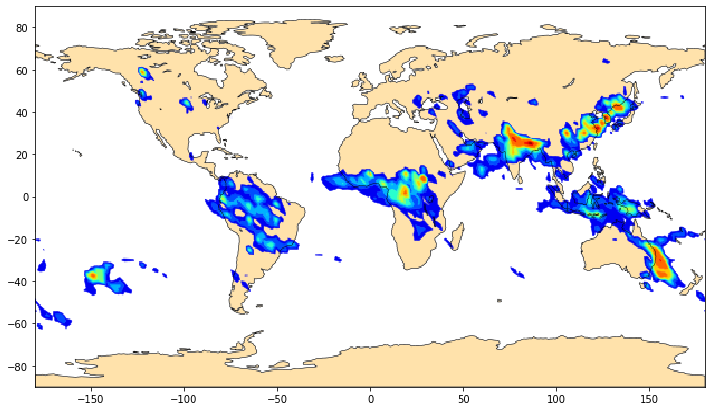

In [2]:
%matplotlib inline
import os, sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def getMap(layerName,bbox,filename):
    wms.getOperationByName('GetMap').formatOptions
    img = wms.getmap(layers=[layerName],
                 size=(600,300),
                 srs='EPSG:4326',
                 bbox=bbox,
                 format='image/png',
                 transparent=True)

    tmpfile = open(filename,'wb')
    tmpfile.write(img.read())
    tmpfile.close()
getMap('foreground',(-180,-90,180,90), 'foreground.png')
getMap('background',(-180,-90,180,90), 'background.png')
getMap('composition_bbaod550',(-180,-90,180,90), 'bbaod550.png')


image_back   = mpimg.imread('background.png')
image_compos = mpimg.imread('bbaod550.png')
image_fore   = mpimg.imread('foreground.png')
fig          = plt.figure(figsize=(12,7))

img_back     = plt.imshow(image_back,extent=[-180,180,-90,90],aspect='auto')
img_compos   = plt.imshow(image_compos,extent=[-180,180,-90,90],aspect='auto')
img_fore     = plt.imshow(image_fore,extent=[-180,180,-90,90],aspect='auto')

### Web Feature Service from OGC

In [3]:
# 2 WFS Demo
import requests
import geojson

wfs_url = "http://data.nanoos.org/geoserver/ows"
params = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='oa:goaoninv', outputFormat='json')

r = requests.get(wfs_url, params=params)
wfs_geo = geojson.loads(r.content)

In [4]:
#print(wfs_geo.keys())
# Show the number of layers
print(len(wfs_geo.__geo_interface__['features']))

616


In [5]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
wfs_gdf = GeoDataFrame.from_features(wfs_geo)

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [7]:
# Show the CRS inforamation for the world data set
print (world.crs)

{'init': 'epsg:4326'}


### Visualization of World Map with Web Feature Service from OGC

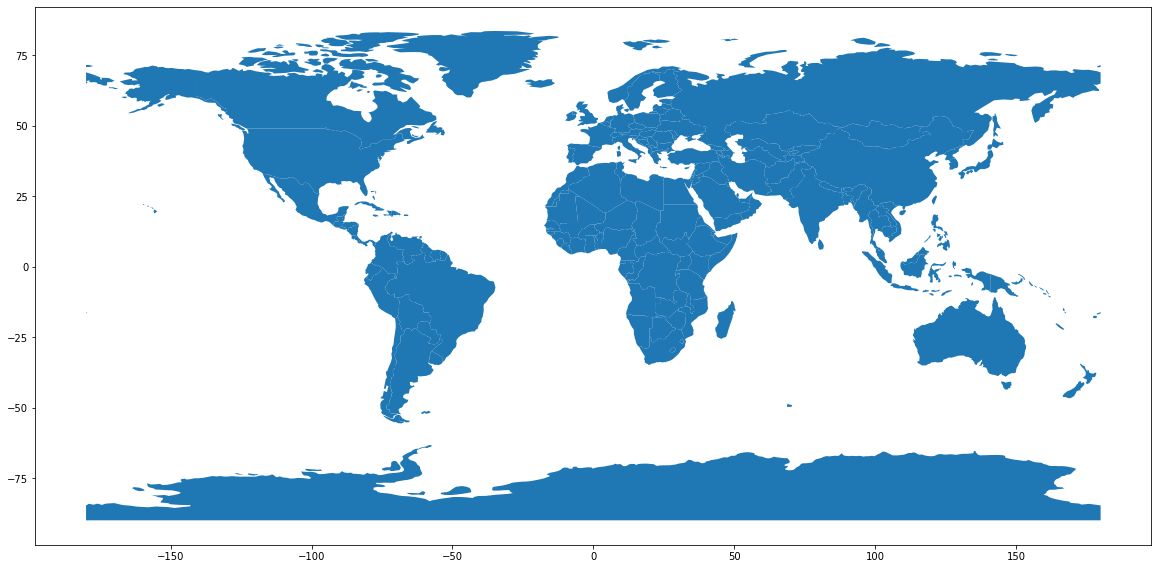

In [8]:
world.plot(figsize=(20, 20));

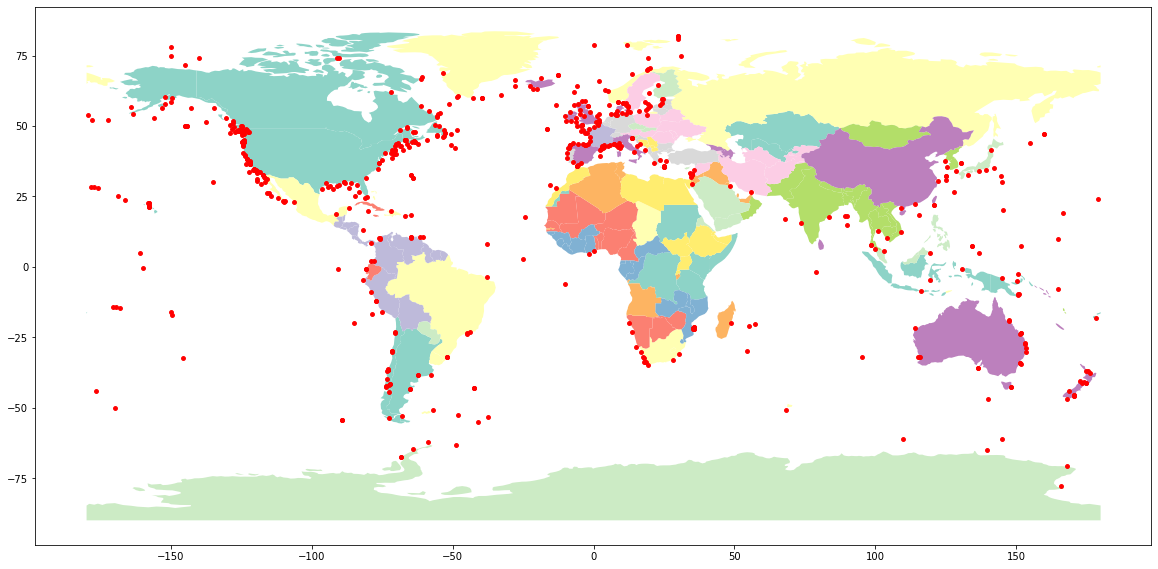

In [9]:
# Show the wfs layer information
wfs_gdf.plot(ax=world.plot(cmap='Set3', figsize=(20, 20)),
             marker='o', color='red', markersize=15);

### Sensor Observation Service from OGC

List the amount of sensors

In [10]:
#SOS Demo
from owslib.sos import SensorObservationService
service = SensorObservationService('http://sensorweb.demo.52north.org/52n-sos-webapp/sos/kvp',version='2.0.0')

print (len(service.contents))

#for content in sorted(service.contents):
#    print(content)


33


In [11]:
id = service.identification
print (id.title)
provider=service.provider
print (provider.name)
len(service.operations)

52N SOS
52North


16

In [12]:
#get FOI
get_foi=service.get_operation_by_name('GetFeatureOfInterest')
try:
    x = unicode('test')
    for x in sorted(get_foi.parameters['featureOfInterest']['values']):
        print(x.encode('utf8'))
except:
    for x in sorted(get_foi.parameters['featureOfInterest']['values']):
        print(x)

adxl345
building
feature_1
http://www.52north.org/test/featureOfInterest/1
http://www.52north.org/test/featureOfInterest/2
http://www.52north.org/test/featureOfInterest/3
http://www.52north.org/test/featureOfInterest/4
http://www.52north.org/test/featureOfInterest/5
http://www.52north.org/test/featureOfInterest/6
http://www.52north.org/test/featureOfInterest/7
http://www.52north.org/test/featureOfInterest/8
http://www.52north.org/test/featureOfInterest/Heiden
http://www.52north.org/test/featureOfInterest/Münster/FE101
http://www.52north.org/test/featureOfInterest/Portland
http://www.52north.org/test/featureOfInterest/TODO
http://www.52north.org/test/featureOfInterest/world
sensor1_id
testArd
www.edisoft.org/java/featureOfInterest/1
www.edisoft.org/java/featureOfInterest/2


### Web Map Tile Service from OGC

In [13]:
#WMTS demo
from owslib.wmts import WebMapTileService
wmts = WebMapTileService("http://geodata.nationaalgeoregister.nl/tiles/service/wmts/ahn1?service=wmts&request=getcapabilities")

In [14]:
print (len(wmts.contents))
print (wmts.identification.type)
print (wmts.identification.version)
print (wmts.identification.title)

layer = sorted(list(wmts.contents))[0]

print (layer)
#print ((wmts.contents))

#print (wmts.contents[layer].styles)
print (wmts.contents[layer])


44
OGC WMTS
1.0.0
Web Map Tile Service
2016_ortho25
Layer Name: 2016_ortho25 Title: 2016_ortho25
